# <span style="color:red"> Establishing causality: Randomization and permutation tests </span>

In [6]:
# Import modules 

import numpy as np
from datascience import *
# from datascience_extensions import *
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

A summary of the methods for Table is [here](http://data8.org/datascience/tables.html) <br>
A tutorial for the datascience module is [here](http://data8.org/datascience/tutorial.html) <br>
A cheatsheet for the datascience module is [here](https://github.com/wstuetzle/STAT180/blob/master/Computing/data8_sp17_midterm_ref_sheet.pdf)

### <span style="color:blue"> Cause and effect </span>
[Data8, Spring 2017, Lec02](https://docs.google.com/presentation/d/1o_rJtBafaEZDKkWIPRV6QqnpkJgv06oOYpZHD7tNoQo/edit#slide=id.g1c15b99389_2_126)

Computational and Inferential Thinking, [Chapter 2](https://www.inferentialthinking.com/chapters/02/causality-and-experiments.html)

### <span style="color:blue"> The Salk vaccine field trial </span>

### <span style="color:blue"> A cloud seeing experiment </span>

Google "cloud seeding

** Cloud seeding experiment **

* Decide whether conditions for seeding are right
* Then toss a coin to decide whether or not to seed

Here are the data for an experiment with 52 clouds, 26 seeded and 26 unseeded

In [36]:
csd = Table.read_table("cloud-seeding-data.csv")
csd.show(5)
csd.num_rows

rainfall,treatment
4.9,unseeded
4.9,unseeded
2745.6,seeded
1697.8,seeded
1656,seeded


52

** Does seeding increase the amount of rainfall ? **

seeded = csd.where("treatment", are.equal_to("seeded"))
unseeded = csd.where("treatment", are.equal_to("unseeded"))

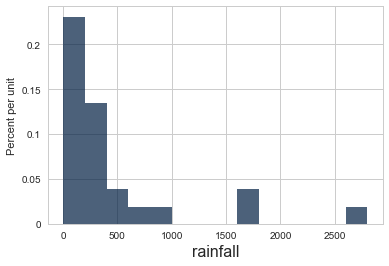

In [39]:
seeded.hist("rainfall", bins = np.arange(0, 3000, 200))

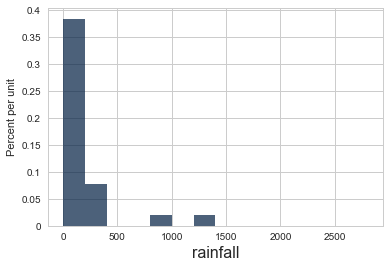

In [40]:
unseeded.hist("rainfall", bins = np.arange(0, 3000, 200))

** Very long tailed distributions **

Use median as a summary, because it is less influenced by outliers

Alternatively, could look at log(rainfall)

In [32]:
np.median(seeded.column("rainfall"))

221.59999999999999

In [33]:
np.median(unseeded.column("rainfall"))

44.200000000000003

<span style="color:red"> ** It appears that seeding does increase rainfall ** </span> 

but

<span style="color:red"> ** Maybe we were just lucky and happend to pick those coulds for seeding that would have produced rain anyways ? ** </span>

<span style="color:red"> ** How can we find out ? **

### <span style="color:blue"> Permutation test </span>

* Suppose cloud seeing had no effect at all.

* Then we would have observed exactly the same value of rainfall, whether or not a cloud has been seeded.

Look at a toy example with 5 clouds, two of which have been seed

In [57]:
toy = Table().with_columns("rainfall", make_array(100, 500, 200, 400, 300), 
                           "treatment", make_array("unseeded", "seeded", "unseeded", "seeded", "unseeded"))
toy

rainfall,treatment
100,unseeded
500,seeded
200,unseeded
400,seeded
300,unseeded


In [64]:
med_seeded = np.median(toy.where("treatment", are.equal_to("seeded")).column("rainfall")) 
med_unseeded = np.median(toy.where("treatment", are.equal_to("unseeded")).column("rainfall"))
med_seeded - med_unseeded

250.0

In [ ]:
# Here are 10 different assignments of the labels "seeded" and "unseeded" to
# the five clouds and the difference between the median rainfalls for seeded and 
# unseeded clouds


# 100  200  300  400  500   median(seeded) - median(unseeded)
# S    S    U    U    U     150 - 400 = -250
# S    U    S    U    U     200 - 400 = -200
# S    U    U    S    U     250 - 300 = - 50
# S    U    U    U    S     300 - 300 =    0
# U    S    S    U    U     250 - 400 = -150
# U    S    U    S    U     300 - 300 =    0
# U    S    U    U    S     350 - 300 =   50
# U    U    S    S    U     350 - 200 =  150
# U    U    S    U    S     400 - 200 =  200
# U    U    U    S    S     450 - 200 =  250   Actually observed assignment

** Actually observed assignment give largest difference between median rainfalls **

** To possible explanations: **

* Our "null hypotheses" that cloud seeding has no effect is false
* We were lucky in picking the clouds to be seeded

The probability of choosing out of ten equally likely possible assignments of the labels "seeded" and "unseeded" the one leading to the largest difference is 1/10 or 10%.

* The probability that we erroneously reject the null hypotheses is 0.1
* We can reject the null hypotheses of "no effect" at the 10% level
* The p-value of the test is 0.1




### <span style="color:blue"> Back to our "real" data </span>

The number of ways of distributing 16 "seeded" labels over the 32 clouds is huge (32 * 31 * 30 * ... * 17). There is no way we an can compute the median(seeded) - median(unseeded) for all these arrangements.

We have to randomly sample a large number of arrangements, compute median(seeded) - median(unseeded) for all of them
and then see where the actually observed difference falls.

In [ ]:
# Here is python code to get a random arrangement of 16 "seeded" labels and 16 "unseeded" labels

In [89]:
labels = csd.select("treatment")

shuffled_labels = labels.sample(k = labels.num_rows, with_replacement = False)
shuffled_labels
shuffled_labels.num_rows

52

88

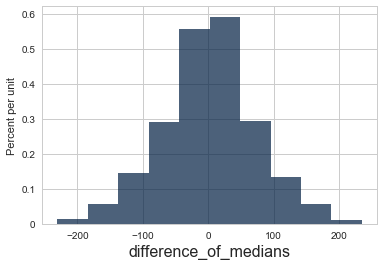

In [105]:
# Computer median(seeded) - median(unseeded) for a large number of arrangements

num_assignments = 10000
difference_of_medians = np.zeros(num_assignments)
for i in range(num_assignments):
    shuffled_labels = labels.sample(k = labels.num_rows, with_replacement = False).column("treatment")
    csd_shuffled = csd.with_column("treatment", shuffled_labels)
    med_seeded = np.median(csd_shuffled.where("treatment", are.equal_to("seeded")).column("rainfall")) 
    med_unseeded = np.median(csd_shuffled.where("treatment", are.equal_to("unseeded")).column("rainfall"))
    difference_of_medians[i] = med_seeded - med_unseeded
    
dom_table = Table().with_column("difference_of_medians", difference_of_medians)

dom_table.hist("difference_of_medians")

# Calculate difference between medians for actually observed assignment of "seeded" and "unseeded"
                                     
med_seeded = np.median(csd.where("treatment", are.equal_to("seeded")).column("rainfall")) 
med_unseeded = np.median(csd.where("treatment", are.equal_to("unseeded")).column("rainfall"))
actually_observed_difference = med_seeded - med_unseeded

# Calculate how many of the random differences are larger that the the actually observed difference

dom_table.where("difference_of_medians", are.above(actually_observed_difference)).num_rows


So: if cloud seeding had no effec, then the probability of observing a difference larger than the one we actually did observe, is 107 / 10,000, or 1.07%

In [42]:
# Extremely long tailed distribution. Maybe look at log(rainfall)

csd_2 = csd.with_column("log_rainfall", np.log(csd.column("rainfall")))

In [43]:
seeded_2 = csd_2.where("treatment", are.equal_to("seeded"))
unseeded_2 = csd_2.where("treatment", are.equal_to("unseeded"))

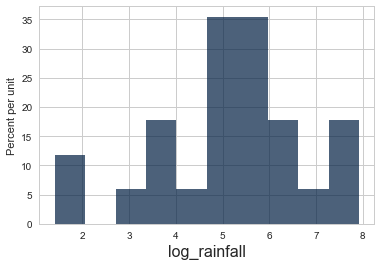

In [44]:
seeded_2.hist("log_rainfall")

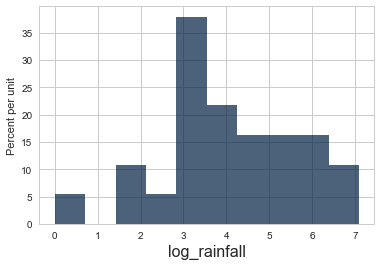

In [45]:
unseeded_2.hist("log_rainfall")